### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [612]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [613]:
data = pd.read_csv('data/coupons.csv')

In [614]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [615]:
#View unique variables in each column of the dataframe. Looks like all are discrete variables.
for col in data:
    print(str(col)+ ": " + str(data[col].unique()))

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
temperature: [55 80 30]
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children: [1 0]
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Soci

In [616]:
#Convert to 24 hour time as integer for potential analysis [Add 24 hour time variable]
data['time24'] = data['time'].str.replace('2PM','14').str.replace('10AM','10').str.replace('6PM','18').str.replace('7AM','7').str.replace('10PM','22').astype(int)
data['time24'].unique()

array([14, 10, 18,  7, 22])

Looks like some missing values listed as 'nan' in certain columns...
Don't see any really problematic, other than that though.


In [617]:
#See how many / where are the null variables.
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
time24                      0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...



In [618]:
car = data.dropna()
car.head()
#use this for analyzing impact of car, however will drop car from rest of data for analyzing other variables because too many nulls in car.

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time24
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,1~3,never,1,0,0,0,1,1,14
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,1~3,never,1,0,0,0,1,0,10
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,1~3,never,1,0,0,0,1,1,10
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,1~3,never,1,1,0,0,1,0,10
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,1~3,never,1,0,0,0,1,1,14


In [619]:
rest = data
rest = rest.drop('car',axis = 1)
rest = rest.dropna()
#For analyzing data other than 'car', since that value is missing in so many columns.
rest.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time24
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,14
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,10
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,10
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,10
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,14


4. What proportion of the total observations chose to accept the coupon? 



In [620]:
data['Y'].sum() / data['Y'].count()

0.5684326710816777

About 56.8% of the total observations chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

In [621]:
#Get number of each type of coupon and count of each. Arbitratily chose to use column 'Y' to count, since that is the output. 
summary = data.groupby('coupon')[['Y']].count().reset_index()
summary

,coupon,Y
0,Bar,2017
1,Carry out & Take away,2393
2,Coffee House,3996
3,Restaurant(20-50),1492
4,Restaurant(<20),2786


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

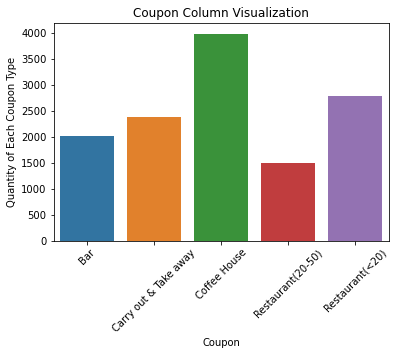

In [622]:
#Plot barplot using seaborn, set axis titles and labels.
plot = sns.barplot(data=summary,x='coupon',y='Y')
plot.set_xlabel('Coupon')
plot.set_ylabel('Quantity of Each Coupon Type')
plot.set(title = 'Coupon Column Visualization')
#Make x-labels legible by rotating.
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

[Text(0.5, 1.0, 'Temperature Column Visualization')]

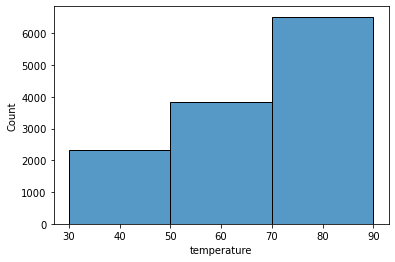

In [623]:
df = data
#Binwidth to make it look nicer (large enough to make bars touch)
sns.histplot(data=df,x='temperature',binwidth = 20)
plot.set(title = 'Temperature Column Visualization')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [624]:
temp = rest
bar = rest[rest['coupon'] == 'Bar']
rest = temp

2. What proportion of bar coupons were accepted?


In [625]:
bar['Y'].sum()/bar['Y'].count()
#0.41191845269210664 is proportion of accepted bar coupons

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [627]:
#Create groups as variables
never = bar[bar['Bar'] == 'never']
less1 = bar[bar['Bar'] == 'less1']
one = bar[bar['Bar'] == '1~3']
four = bar[bar['Bar'] == '4~8']
gt8 = bar[bar['Bar'] == 'gt8']
#Differentiate the two groups
less3 = (never['Y'].sum() + less1['Y'].sum() + one['Y'].sum()) / (never['Y'].count() + less1['Y'].count() + one['Y'].count())
more3 = (four['Y'].sum() + gt8['Y'].sum()) / (four['Y'].count() + gt8['Y'].count())
print(less3)
print(more3)
#Acceptance rate for those who went more than 3 times a month is much higher than those that wen 3 or less.

0.37267441860465117
0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [600]:
more1 = bar[(bar['Bar'] == '1~3') | (bar['Bar'] == '4~8') | (bar['Bar'] == 'gt8')]
more1over25 = more1[(more1['age'] == '26')|(more1['age'] == '31')|(more1['age'] == '50plus')|(more1['age'] == '41')|(more1['age'] == '36')|(more1['age'] == '46')]

less1 = bar[(bar['Bar'] == 'never') | (bar['Bar'] =='less1')]
rest = bar[~bar.isin(more1over25)].dropna()
print((more1over25['Y'].sum()) / (more1over25['Y'].count()))
print(rest['Y'].sum()/rest['Y'].count())
#There is a much higher acceptance rate for drivers who go to a bar more than once a month and are over 25 compared to all other drivers.

0.6898263027295285
0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [628]:
bar51 = bar[(bar['passanger']!='Kid(s)') & (bar['occupation']!='Farming Fishing & Forestry')]
bar52 = bar[(bar['passanger']=='Kid(s)') | (bar['occupation']=='Farming Fishing & Forestry')]
print(bar51['Y'].sum()/bar51['Y'].count())
print(bar52['Y'].sum()/bar52['Y'].count())

#Those who had passangers that were not kids and were not in said occupations were more likely to accept than the rest of the drivers.

0.4349095154699358
0.215


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [629]:
#Simply finds the proportion of people who accepted the coupon in the given dataframe. Assuming no null values in 'Y' column.
def compare(x):
    return(x['Y'].sum()/x['Y'].count())


In [631]:
g1 = (bar[((bar['Bar']!='less1') & (bar['Bar']!='never')&(bar['passanger']!='Kid(s)')&(bar['maritalStatus']!='Widowed')) |
                  ((bar['Bar']!='less1') & (bar['Bar']!='never')&((bar['age']=='21')|(bar['age']=='26')|(bar['age']=='below21'))) |
                  (((bar['RestaurantLessThan20']=='4~8')|(bar['RestaurantLessThan20']=='gt8')) & ((bar['income']=='$12500 - $24999')|(bar['income']=='$37500 - $49999')|(bar['income']=='$25000 - $37499')|(bar['income']=='Less than $12500')))
])
#Group of people following criteria given in 6.

g2 = bar[~bar.isin(g1)].dropna()
#Dataframe of everyone not in the first group

print(compare(g1))
print(compare(g2))

#Drivers in the first group, who either had passengers that were not kids and were not widowed, or were under the age of 30, or went to cheap restaurants more oftehn and had lower incomes were more likely to accept the coupons than everyone else.


0.5871313672922251
0.29991431019708653


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations,  it appears as though those that go to bars more frequently are more likely to accept bar coupons, and those that are younger and don't have kids are also more likely to be in the group that accepted bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Look at what kinds of people accepted coupons for Restaurants costing between 20 and 50 on average

In [632]:
rest = data
rest = rest.drop('car',axis = 1)
rest = rest.dropna()
exp = rest[rest['coupon'] == 'Restaurant(20-50)']
#Get dataframe with only entries where coupon is for a more expensive restaurant.

In [633]:
#Verify that there are no missing values in modified dataset.
exp.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
time24                  0
dtype: int64

In [634]:
#Overall rate of coupon acceptance for these restaurants.
print(compare(exp)) 
#Overall rate of coupon acceptance in general.
print(compare(data))

0.44601270289343686
0.5684326710816777


Overall acceptance rate for these kinds of coupons are lower than average.

In [635]:
print(compare(exp)) 
#Overall rate of coupon acceptance for these restaurants.

0.44601270289343686


Does temperature at time of Coupon arrival affect Acceptance Rate of Coupon?

<AxesSubplot:xlabel='temperature', ylabel='Y'>

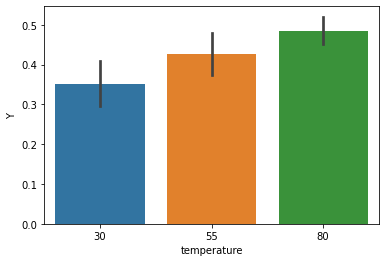

In [641]:
#See whether temperature affects acceptance rate of coupon.
sns.barplot(data = exp, x = 'temperature', y = 'Y')

Rate of coupon acceptance for these restaurants appears to be slightly higher with increased temperature.

Does consumer income affect acceptance rate of these types of coupons?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Less than $12500'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, '$100000 or More')])

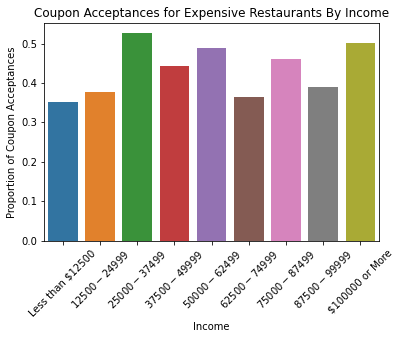

In [642]:
#Re-index in order of increasing income for easier data analysis.
expmod = exp.groupby('income')[['Y']].mean().reset_index().reindex([8,1,2,3,4,5,6,7,0])

#Barplot to compare proportion of coupon acceptances
plot = sns.barplot(data=expmod,x='income',y='Y')
plot.set_xlabel('Income')
plot.set_ylabel('Proportion of Coupon Acceptances')
plot.set(title = 'Coupon Acceptances for Expensive Restaurants By Income')
plt.xticks(rotation = 45)

There does not appear to be a tremendous impact on acceptance rate for coupons based on income when it comes to more expensive restaurants, as the proportion fluctuates with each income group.

Does the type of passanger in a car affect rate of coupon acceptance?

[Text(0.5, 1.0, 'Coupon Acceptances for Expensive Restaurants By Passenger')]

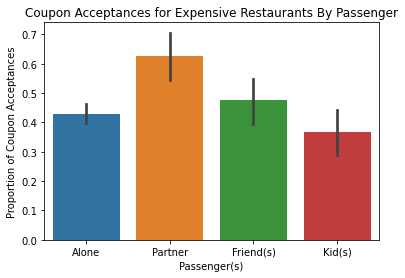

In [653]:
#Create barplot to compare passanger type with coupon acceptance rate.
plot = sns.barplot(data=exp,x='passanger',y='Y')
plot.set_xlabel('Passenger(s)')
plot.set_ylabel('Proportion of Coupon Acceptances')
plot.set(title = 'Coupon Acceptances for Expensive Restaurants By Passenger')


It appears that people travelling with their partners are more likely to accept the coupon than the other groups.

Does coupon Expiration Time affect rate of acceptance?

[Text(0.5, 1.0, 'Coupon Acceptances for Expensive Restaurants By Coupon Expiration Time')]

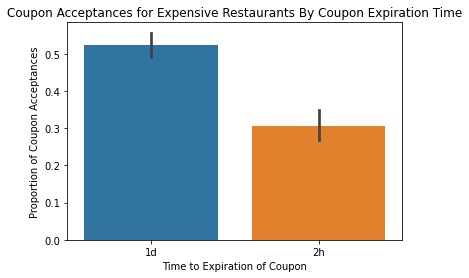

In [644]:
#Create barplot to compare passanger type with coupon Expiration Time.
plot = sns.barplot(data=exp,x='expiration',y='Y')
plot.set_xlabel('Time to Expiration of Coupon')
plot.set_ylabel('Proportion of Coupon Acceptances')
plot.set(title = 'Coupon Acceptances for Expensive Restaurants By Coupon Expiration Time')

People seem more likely to accept the coupon if the expiration time is longer

Does time of day when coupon appears affect acceptance rate? Does time of coupon expiration have different acceptance rates depending on time of day?

[Text(0.5, 1.0, 'Coupon Acceptances for Expensive Restaurants By Time of Day and Expiration Time')]

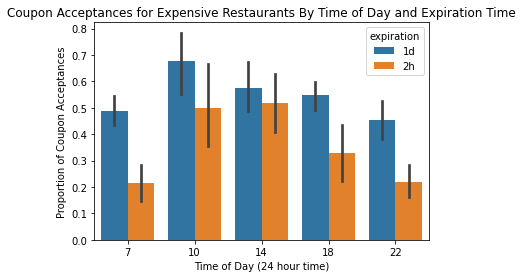

In [648]:
plot = sns.barplot(data=exp,x='time24',y='Y',hue='expiration')
plot.set_xlabel('Time of Day (24 hour time)')
plot.set_ylabel('Proportion of Coupon Acceptances')
plot.set(title = 'Coupon Acceptances for Expensive Restaurants By Time of Day and Expiration Time')

People seem more likely to accept a coupon towards the morning or middle of the day, rather than early morning or later at night. In addition, although people are generally more willing to accept coupons with longer expiration times than the shorter one, their acceptance rate for shorter duration coupons is much higher towards the middle of the day than normal, while the longer expiration date's acceptance rate fluctuates much less throughout the day.

# Findings

Customers who were offered coupons for restaurants with an average cost between \\$20 and \\$50 appear to be slighly more likely to accept the coupon in warmer weather, as average coupon acceptance rate increased with each increasing temperature.

This can be potentially further explored by gathering data with more specific temperatures and determing whether there is an optimal temperature when to offer coupons.

Interestingly, consumer income did not appear to really have an impact on average acceptance of coupons, as acceptance rate fluctuated up and down with increasing income range.

In the future, this can be better explored with more precise incomes, rather than income ranges, or even tighter income ranges. This data can also be compared with income vs acceptance rate for coupons of varying restaurant costs for further analysis.

People travelling with their partners are more likely to accept the coupon than the other groups.

This could be used to target coupons towards audiences more likely to be travelling with a partner, as they are more likely to accept said coupons.

As is perhaps expected, people are more likely to accept the coupon if the expiration date is 1 day, compared to 2 hours. Interestingly, however, while people are most likely to accept coupons towards the middle of the day, their acceptance rate for the 2 hour expiry coupons increases by far more in the middle of the day compared to early morning or night, while their acceptance for 1 day expiry coupons stays much more stable (although it follows a similar pattern)

This could guide coupon distribution as different expiry lengths could be sent depending on time of day to maximize coupon acceptance, however this could be further explored with coupons of more different expiry times and more times of the day, as these values are fairly restrictive.